In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the text file
data = np.loadtxt('data/Debutanizer_Column_Data.txt', skiprows=1)

x_temp = data[:, :7]
y_temp = data[:, 7]

TRAIN_SIZE = 1200
VAL_SIZE = 400

x_new = np.zeros([2390, 10])
x_6 = x_temp[:, 4]
x_9 = (x_temp[:, 5] + x_temp[:, 6])/2
x_new[:, :5] = x_temp[4: 2394, :5]

x_new[:, 5] = x_6[3: 2393]
x_new[:, 6] = x_6[2: 2392]
x_new[:, 7] = x_6[1: 2391]
x_new[:, 8] = x_9[4: 2394]
x_new[:, 9] = y_temp[:2390]
#x_new[:, 9] = y_temp[3: 2393]
#x_new[:, 10] = y_temp[2: 2392]
#x_new[:, 11] = y_temp[1:2391]
#x_new[:, 12] = y_temp[:2390]
y_new = y_temp[4: 2394]
y_new = y_new.reshape([-1, 1])

train_x = x_new[:TRAIN_SIZE, :]
train_y = y_new[:TRAIN_SIZE]

val_x = x_new[TRAIN_SIZE:TRAIN_SIZE+VAL_SIZE, :]
val_y = y_new[TRAIN_SIZE:TRAIN_SIZE+VAL_SIZE]

test_x = x_new[TRAIN_SIZE+VAL_SIZE:2390, :]
test_y = y_new[TRAIN_SIZE+VAL_SIZE:2390]


C:\Users\cwf21\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cwf21\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cwf21\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

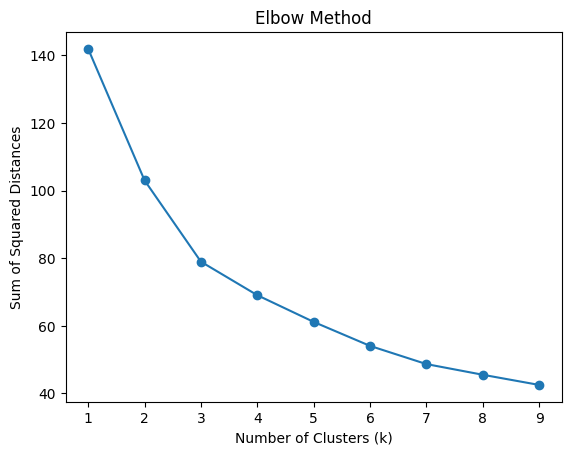

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 10)
inertias = []  # Sum of squared distances of samples to their closest cluster center

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_x)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [3]:
def clusters(clusters, X, Y):
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    clustered_input = []
    clustered_output = []
    for i in range(clusters):
        cluster_points = X[cluster_labels == i]
        cluster_output = Y[cluster_labels == i]
        clustered_input.append(cluster_points)
        clustered_output.append(cluster_output)
    return clustered_input, clustered_output, centroids



In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def parameters(X, Y):
    
    W = []
    b = []
    for i in range(len(X)):
        cluster_data = X[i]
        cluster_output = Y[i]

        # Create and fit the linear regression model
        linear_regression = LinearRegression()
        linear_regression.fit(cluster_data, cluster_output)
        predictions = linear_regression.predict(cluster_data)
        mse = mean_squared_error(cluster_output, predictions)
        

    # Access the coefficients (parameters)
        coefficients = linear_regression.coef_
        intercept = linear_regression.intercept_
        W.append(coefficients)
        b.append(intercept)
    return W, b
    

In [5]:
def fit_clusters(train_x, train_y, test_x,test_y, k):
    clustered_input, clustered_output, centroids = clusters(k, train_x, train_y )
    W, b = parameters(clustered_input, clustered_output)
    assigned_clusters = []
    y_predict = np.zeros(len(test_x))

    for i in range(len(test_x)):
        # Calculate distances to centroids
        distances = np.linalg.norm(test_x[i] - centroids, axis=1)
        # Assign data point to the cluster with the closest centroid
        closest_cluster = np.argmin(distances)
        assigned_clusters.append(closest_cluster)
        y_predict[i] = np.dot(W[closest_cluster], test_x[i].reshape(10, 1)) + b[closest_cluster]

    mse = mean_squared_error(test_y, y_predict)
    
    return y_predict , mse

    

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the linear regression model on training data
linear_regression = LinearRegression()
linear_regression.fit(train_x, train_y)

# Predict the output for test data using the trained model
predictions = linear_regression.predict(test_x)

# Calculate the mean squared error (MSE) for the test predictions
mse = mean_squared_error(test_y, predictions)
print(linear_regression.coef_)
# Print the MSE for the test predictions
print("Mean Squared Error:", mse)

[[-0.03356618 -0.0255736  -0.00750688  0.02226112 -0.03274569 -0.02042345
   0.22817793 -0.45270655  0.06035037  0.91340961]]
Mean Squared Error: 0.0020759815822885934


In [8]:
min_mse = 1000
index = 10000
for i in range(100):

    y, mse = fit_clusters(train_x, train_y,test_x,test_y, i+1)
    if mse < min_mse:
        min_mse = mse
        index = i
#print(test_y[0])
print(min_mse)
print(index)

C:\Users\cwf21\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cwf21\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\cwf21\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

0.0020759815822885934
0
